# Linear Regression
Welcome to the linear regression exercise. In this exercise we will fit linear data with a minimal neural network model. We will learn how to plot the data, how to set up a suitable model, how to train it and how to look at the results.

## Imports and Seeding
First we will do the necessary imports:
* `numpy` for general data handling and array manipulation
* `tensorflow` to build and train the regression model
* `matplotlib.pyplot` for plotting

In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

Then we set a random seed for the `np.random` module. This makes our code reproducible as the random operations will yield the same results in every run through the notebook.

In [2]:
# for reproducibility
np.random.seed(42)

## Data creation
First we set the main parameters of our data:
* `n_dim`: The number of dimensions to be used
* `n_data`: The number of datapoints that will be used
* `uncertainty`: The uncertainty which will be used when creating the dataset

In [3]:
# parameter
n_dim = 2
n_data = 1000
uncertainty = 0.2

Now we will create our data by dicing random values x (n-dimensional) and then transforming them using a multi-dimensional linear function with randomly set parameters.

In [4]:
# create data
# we dice random linear functions
x = np.random.uniform(size=(n_data, n_dim))
w = np.random.rand(n_dim)[None, ...]
b = np.random.rand(1)

print(f"Your linear function has slopes of {w} and an offset of {b}")

y = np.sum(x*w, axis=-1) + b
y += np.random.uniform(low=-uncertainty, high=uncertainty, size=y.shape)

Your linear function has slopes of [[0.26170568 0.2469788 ]] and an offset of [0.90625458]


## Data visualization
Using `plt.scatter` we can plot our data $y = f(x_i)$ in all dimensions ($i$):

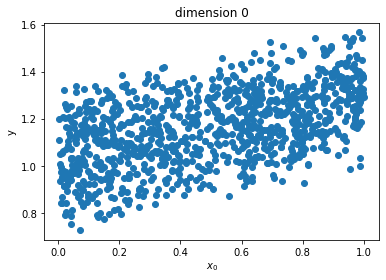

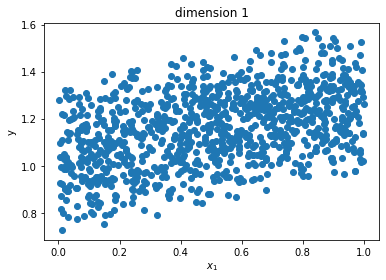

In [5]:
"""
TODO: Visualize the data y = f(x_i) in every dimension (i).
"""
for i in range(n_dim):
    plt.scatter(x[:, i], y)
    plt.xlabel(rf"$x_{{{i}}}$")
    plt.ylabel("y")
    plt.title(f"dimension {i}")
    plt.show()

## Model Creation
Now it is time to set up the model. We will use the `tf.keras.models.Sequential` API to do so.

In [6]:
"""
TODO: Create a tf.keras.model using the `tf.keras.models.Sequential` API.
You may answer the following questions first:
- How many inputs does our model need?
- How many outputs does our model need?
"""
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(n_dim,)),
])

2022-08-05 12:03:47.300274: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


We can extract the prediction of our model using the `model.predict` function.
Do so and plot the prediction of the model along with the original data.

2022-08-05 12:03:47.908417: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


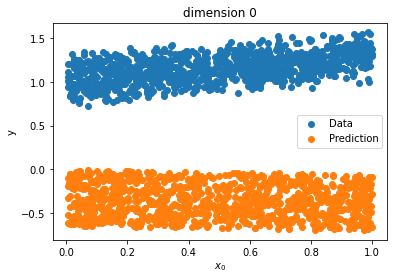

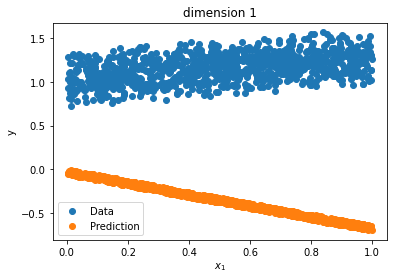

In [7]:
"""
TODO: Extract the prediction of the model y = f_DNN(x_i) and plot it alogn with the data f(x_i) that
you already have visualized in the task above.
"""
for i in range(n_dim):
    plt.scatter(x[:, i], y, label="Data")
    pred = model.predict(x)[:, 0]
    plt.scatter(x[:, i], pred, label="Prediction")
    plt.xlabel(rf"$x_{i}$")
    plt.ylabel("y")
    plt.title(f"dimension {i}")
    plt.legend()
    plt.show()

## Model Training
Before training the model we need to compile it.
In the compilation we can configure its losses, metrics and the used optimizers.
For the loss, we will use the mean squarred error (`"mse"`), as optimizer we will use the Stochastic Gradient Descent (`"sgd"`).

In [8]:
"""
TODO: Compile the model using the model.compile function.
"""
model.compile(loss="mse", optimizer="sgd")

Now everything is set up and we are ready to train our model using the `model.fit` function.

In [9]:
"""
TODO: Train the model using the model.fit function.
"""
model.fit(x, y, epochs=100, verbose=0)

## Model evaluation
In such a simple model we can still look at every of the weights by eye. We also know, what the weights of our simple model should look like. Print the weights of the model and look at them. What do you observe? Do the values make sense?

In [10]:
"""
TODO: Print the weights of every layer of our model.
"""
for layer in model.layers:
    for weight in layer.weights:
        print(weight.name, weight.numpy())

dense/kernel:0 [[0.26794323]
 [0.23141535]]
dense/bias:0 [0.91071093]


Last but not least we will also look at the prediction of our model after the training. You can reuse the code from some cells above. Plot the prediction of the model along with the original data. What do you observe? Does this meet your expectation?

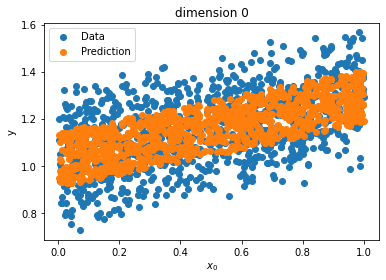

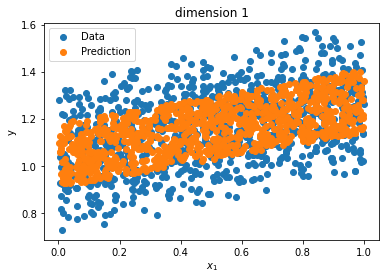

In [11]:
"""
TODO: Extract the prediction of the model y = f_DNN(x_i) and plot it alogn with the data f(x_i).
"""
for i in range(n_dim):
    plt.scatter(x[:, i], y, label="Data")
    pred = model.predict(x)[:, 0]
    plt.scatter(x[:, i], pred, label="Prediction")
    plt.xlabel(rf"$x_{i}$")
    plt.ylabel("y")
    plt.title(f"dimension {i}")
    plt.legend()
    plt.show()

## Further Tasks
Go back to the beginning of the notebook. There, we set the uncertainty of the data generation and the number of dimensions. Perform the following tasks:
* What happens if the measured data (y) is uncertain (uncertainty > 0)? Explain your observation!
* Vary the number of input dimensions to n=1/2/10. How do you need to change the model? Describe your observation.

## Summary
This concludes our tutorial on the linear regression.

In this tutorial you have learned:
* How to visualize N dimensional data distributions
* How to build a tf.keras model
* How to train a tf.keras model on a given data distribution
* How to visualize the output of your model
* How the scenario of the linear regression changes with uncertainty on the training data
* How the scenario of the linear regression changes with the number of dimensions